# Load Data & Import Library

In [ ]:
!pip install sidetable

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#Manipulation
import numpy as np
import pandas as pd
import sidetable as stb
import matplotlib

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [ ]:
!pip install matplotlib==3.5.1

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#Install Category Encoding
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


# Dataset

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# **Stage 1 - EDA**

## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


 #cek missing value
df.isna().sum()**jawaban 1A.**
Tipe data pada setiap kolom sudah sesuai,
nama kolom dengan isi datanya sudah sesuai

Tipe data dari masing-masing variable/ kolom yang ada perlu dilakukan beberapa penyesuaian, 

In [ ]:
 #cek missing value
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**jawaban 1B.** tidak ada kolom yang memiliki nilai kosong 

In [ ]:
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("")   

id :
[     1      2      3 ... 381107 381108 381109]

Gender :
['Male' 'Female']

Age :
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License :
[1 0]

Region_Code :
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured :
[0 1]

Vehicle_Age :
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage :
['Yes' 'No']

Annual_Premium :
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel :
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.

untuk kolom Policy Sales Channel meskipun datanya berupa angka numerik namun jika dilihat di detail data, <br>
Policy Sales Channel merupakan metode menghubungi klien yang tiap angkanya merepresentasikan satu metode dan berisi banyak nilai unik, namun tidak ada keterangan yang jelas mengenai kolom tersebut. <br><br>

Sehingga, kolom Policy Sales Channel tidak digunakan dalam step berikutnya.

In [ ]:
#membagi tipe data numerik dan categorical

numbs=['Age','Annual_Premium','Vintage']
cats_nom=['Region_Code','Gender','Driving_License','Previously_Insured','Vehicle_Damage','Response']
cats_ord=['Vehicle_Age']

In [ ]:
df_numbs= df[numbs]
df_cats_nom= df[cats_nom]
df_cats_ord= df[cats_ord]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df_cats_nom= df_cats_nom.astype(str)
df_cats_nom.describe()

,Region_Code,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Response
count,381109,381109,381109,381109,381109,381109
unique,53,2,2,2,2,2
top,28.0,Male,1,0,Yes,0
freq,106415,206089,380297,206481,192413,334399


In [ ]:
df_cats_ord.describe()

,Vehicle_Age
count,381109
unique,3
top,1-2 Year
freq,200316


In [ ]:
df[numbs].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


**jawaban 1C.** Secara keseluruhan tidak ada variable yang memiliki anomali terhadap analisa descriptive statistiknya. <br>
Untuk variabel annual premium memiliki nilai yang anomali pada nilai maksimumnya sehingga menjadi indikasi adanya outlier.

## Univariate Analysis

### Boxplot

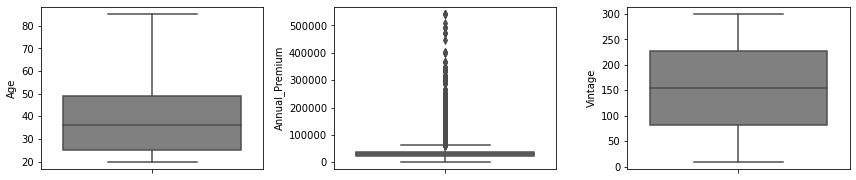

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(numbs)):
    plt.subplot(2, len(numbs), i+1)
    sns.boxplot(y=df[numbs[i]], color='gray')
    plt.tight_layout()



Berdasarkan grafik di atas, data dari variable 'Annual_Premium' memiliki banyak outlier. Namun 'Annual_Premium' sendiri nantinya bisa digunakan dalam pengkategorian tipe costumer untuk kebutuhan bisnis dan machine learning modelling




### Single Distribution

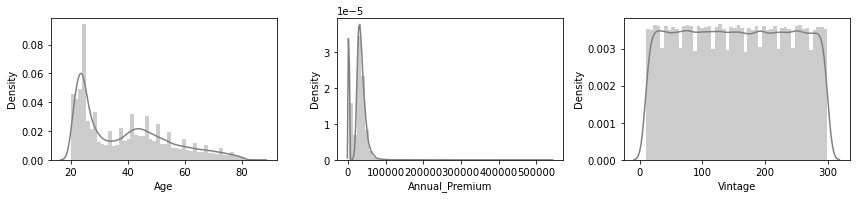

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(numbs)):
    plt.subplot(2, len(numbs), i+1)
    sns.distplot(df[numbs[i]], color='gray')
    plt.tight_layout()


Data pada kolom age dan annual premium berbentuk right-skewed sehingga dianalisis lebih lanjut pada tahap data pre-processing,<br>
sementara data pada kolom vintage berbentuk uniform distribution.


### Violin

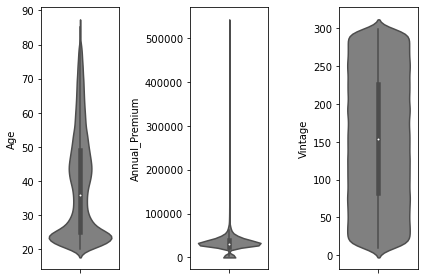

In [ ]:
for i in range(0, len(numbs)):
    plt.subplot(1, len(numbs), i+1)
    sns.violinplot(y=df[numbs[i]], color='gray', orient='v')
    plt.tight_layout()


<ul>
<li>pada kolom age data customer terbanyak ada pada umur 24</li>
<li>pada kolom annual premium customer terbanyak ada pada nilai 2630, dan membunyai banyak outliers</li>
<li>pada kolom vintage memiliki data jumlah customer yang sama setiap nilainya</li>


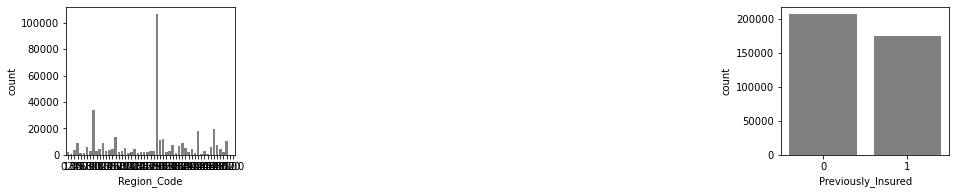

In [ ]:
plt.figure(figsize=(20,5))
for i in range(0, len(cats_nom),i+1):
  plt.subplot(2, len(cats_nom), i+1)
  sns.countplot(df[cats_nom[i]], color='gray', orient='h')
  plt.tight_layout()

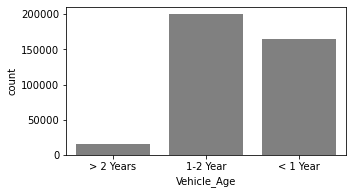

In [ ]:
plt.figure(figsize=(5,5))
for i in range(0, len(cats_ord),i+1):
  plt.subplot(2, len(cats_ord), i+1)
  sns.countplot(df[cats_ord[i]], color='gray', orient='h')
  plt.tight_layout()

In [ ]:
df.stb.freq(['Gender'], cum_cols = False)

,Gender,count,percent
0,Male,206089,54.07613
1,Female,175020,45.92387


54% customer health insurance adalah laki-laki

In [ ]:
df.stb.freq(['Driving_License'], cum_cols=False)

,Driving_License,count,percent
0,1,380297,99.786938
1,0,812,0.213062


99.7% customer health insurance mempunyai driving license/ hampir seluruh dataset

In [ ]:
df.stb.freq(['Previously_Insured'], cum_cols=False).head()

,Previously_Insured,count,percent
0,0,206481,54.178988
1,1,174628,45.821012


54% customer health insurance sudah mempunyai asuransi kendaraan/ lebih dari setengah dataset

In [ ]:
df.stb.freq(['Vehicle_Age'], cum_cols=False)

,Vehicle_Age,count,percent
0,1-2 Year,200316,52.561341
1,< 1 Year,164786,43.238549
2,> 2 Years,16007,4.200111


52% customer health insurance mempunya umur kendaraan 1-2 tahun/ lebih dari setengah dataset

In [ ]:
df.stb.freq(['Vehicle_Damage'], cum_cols=False)

,Vehicle_Damage,count,percent
0,Yes,192413,50.487656
1,No,188696,49.512344


50% customer health insurance kendaraannya memiliki kerusakan/ setengah dari dataset

In [ ]:
df.stb.freq(['Response'], cum_cols=False)

,Response,count,percent
0,0,334399,87.743664
1,1,46710,12.256336


hanya 12% customer health insurance tertarik terhadap asuransi kendaraan

## Multivariate Analysis

### Correlation by Heatmap

In [ ]:
df_numbs_target=df_numbs.copy()
df_numbs_target['Response']=df['Response']
df_numbs_target

,Age,Annual_Premium,Vintage,Response
0,44,40454.0,217,1
1,76,33536.0,183,0
2,47,38294.0,27,1
3,21,28619.0,203,0
4,29,27496.0,39,0
...,...,...,...,...
381104,74,30170.0,88,0
381105,30,40016.0,131,0
381106,21,35118.0,161,0
381107,68,44617.0,74,0


<AxesSubplot:>

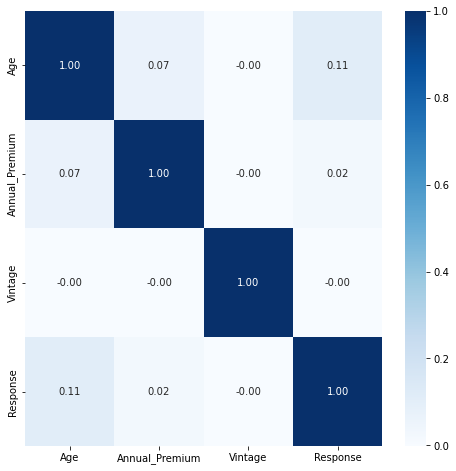

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_numbs_target.corr(), cmap='Blues', annot=True, fmt='.2f')

**korelasi yang perlu dianalisis lebih lanjut dari analisis heatmap di atas:** <br><br>

dapat dilihat bahwa ***korelasi response vs age adalah 0.11***,<br> cukup terlihat dibandingkan lainnya.  Berarti ada kemungkinan response terpengaruh dengan age. <br> Perlu dianalisis lebih lanjut bagaimana pengaruh age terhadap response. <br> <br>

Nilai ***korelasi yang rendah terhadap target pada fitur Annual_Premium*** bisa disebabkan oleh banyaknya outlier seperti yang ditampilkan pada univariate analysis. <br> <br>

***Sedangkan pada fitur vintage*** bisa disebabkan oleh distribusi data yang berupa uniform distribution. <br> <br>

Untuk itu diperlukan feature engineering untuk fitur ini dan dilakukan pengecekan korelasi ulang untuk 2 fitur tersebut



**yg belum tergambarkan dari heatmap adalah** <br>
korelasi antara target (Response) dengan feature yang mempunyai tipe data kategorik. <br> Pengecekan korelasi ini dilakukan di bawah ini:

### Correlation and Distribution 

<Figure size 576x576 with 0 Axes>

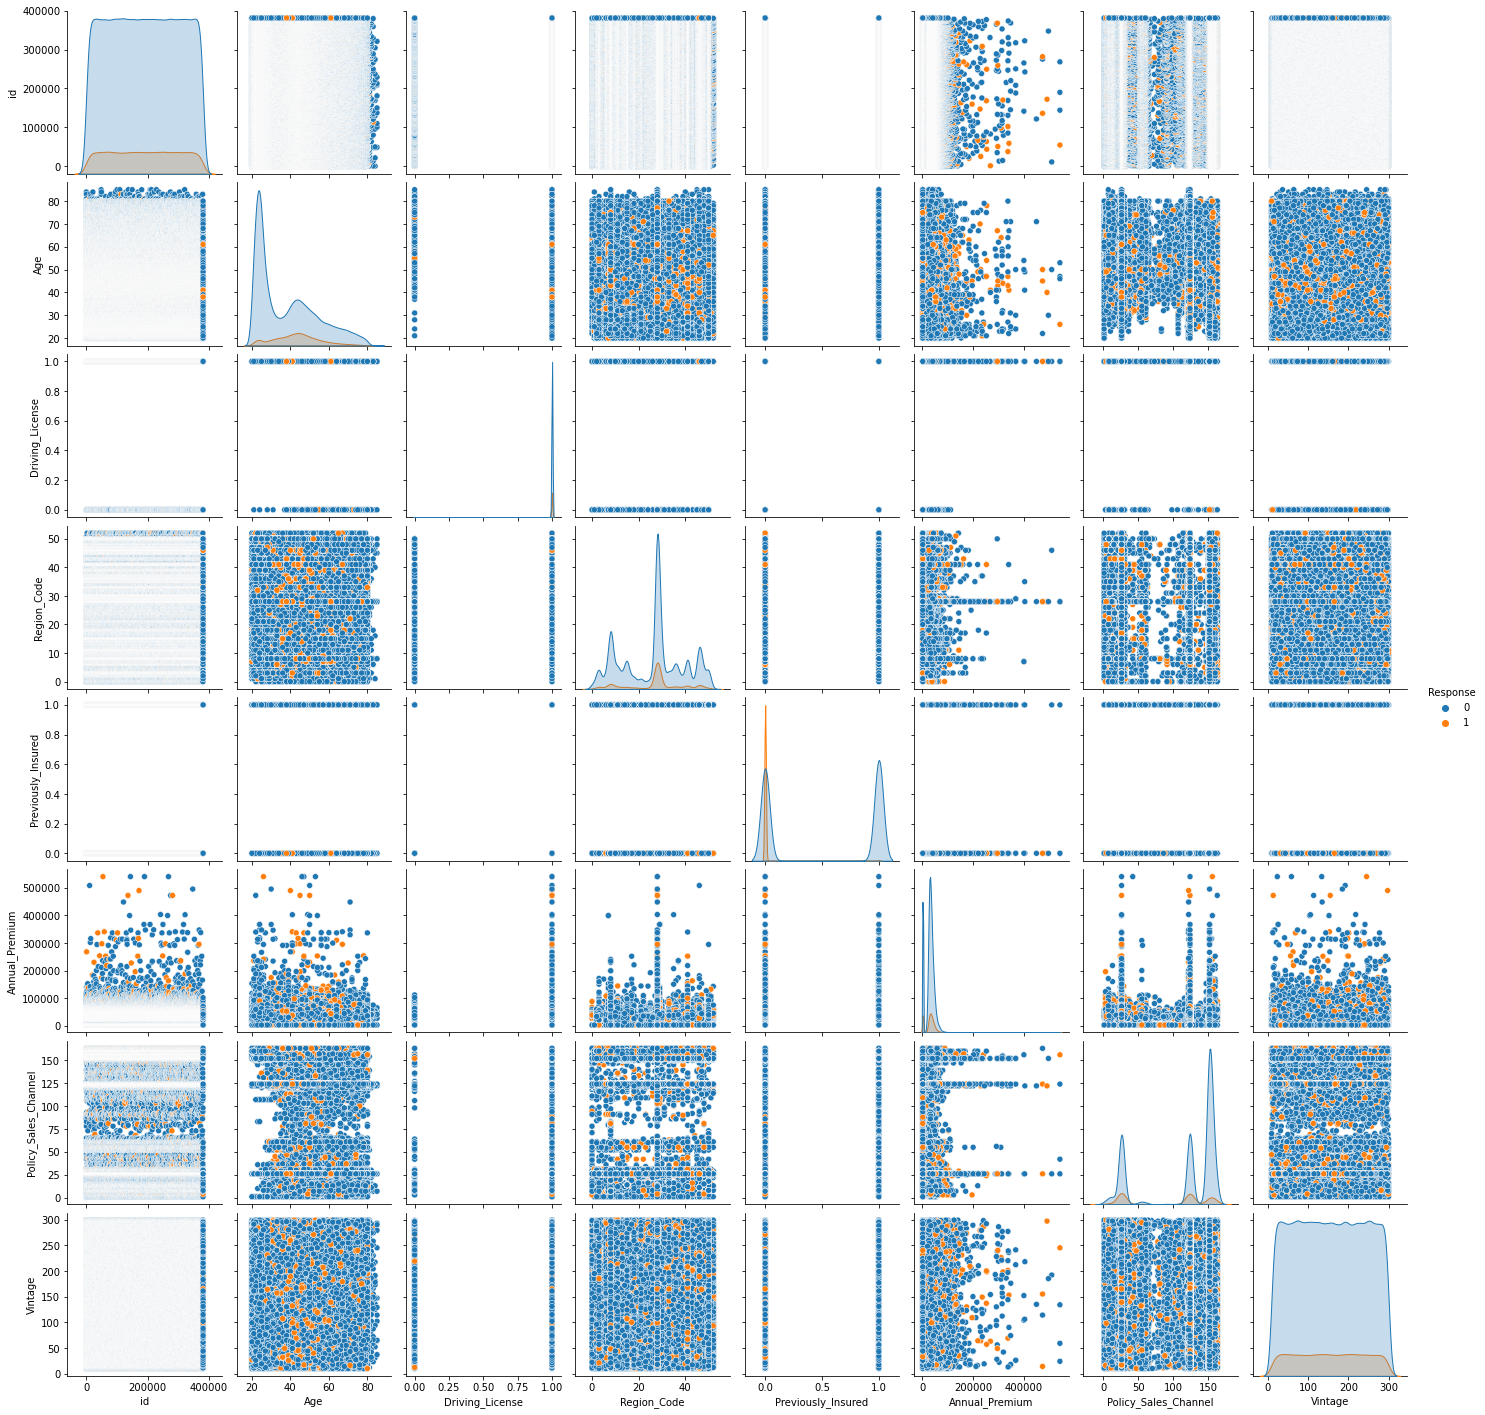

In [ ]:
#pallet size
plt.figure(figsize=(8,8))

#pairplot
sns.pairplot(df, diag_kind='kde', hue='Response')

plt.show()

Berdasarkan grafik pairplot di atas, menunjukan korelasi dan distribusi dari hubungan antara setiap variable/ feature satu sama lain.<br>

Dari grafik pairplot belum terlihat secara jelas fitur yang mempunyai korelasi kuat terhadap target.<br>

Pengecekan korelasi ini dilakukan di bawah ini:

### Response vs Gender
*Korelasi yang belum tergambarkan dari Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Gender'], normalize = 'index')

Gender,Female,Male
Response,,
0,0.469006,0.530994
1,0.389317,0.610683


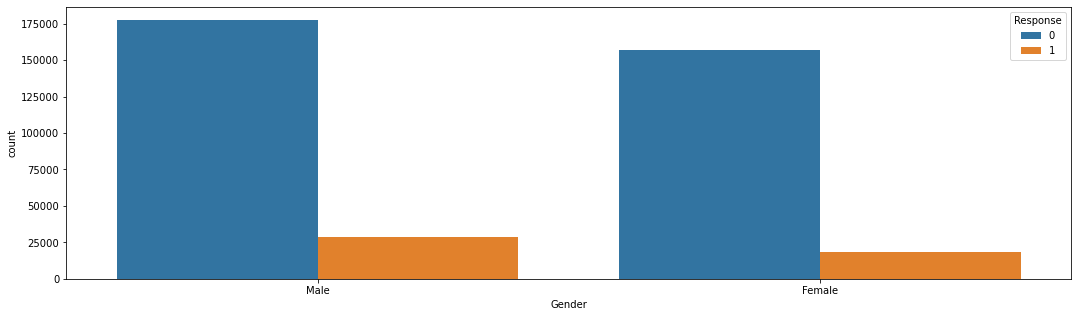

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Gender'], hue = df['Response'])
plt.show()

Conclusion
<ul>
<li>Sebesar 61% dari responden yang tertarik (memiliki nilai 'Response' sama dengan 1) adalah Gender 'Male'</li>
</ul> 

### Response vs Vehicle_Damage
*Korelasi yang belum tergambarkan dari Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Vehicle_Damage'], normalize = 'columns')

Vehicle_Damage,No,Yes
Response,,
0,0.994796,0.762345
1,0.005204,0.237655


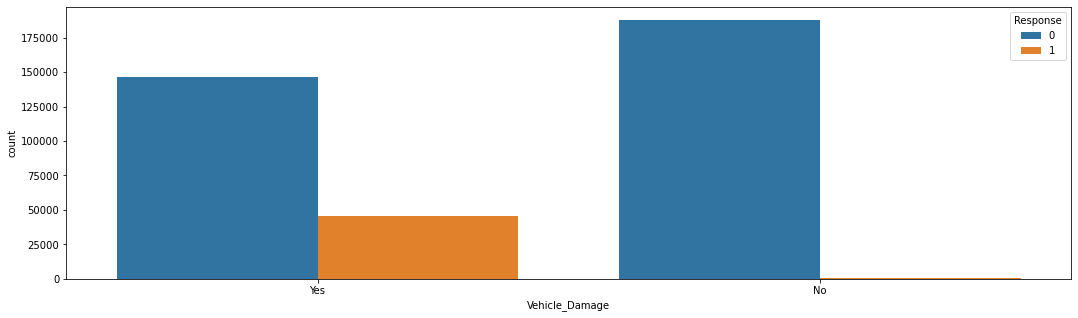

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Vehicle_Damage'], hue = df['Response'])
plt.show()

-customer yang mempunyai kerusakaan kendaraan di masa lalu, 23%nya tertarik terhadap asuransi kendaraan

### Response vs Vehicle_Age
*Korelasi yang belum tergambarkan dari Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Vehicle_Age'], normalize = 'columns')

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,0.826245,0.956295,0.706254
1,0.173755,0.043705,0.293746


In [ ]:
df_va=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df_va

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


<Figure size 1296x360 with 0 Axes>

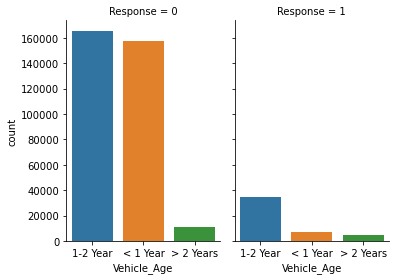

In [ ]:
plt.figure(figsize = (18, 5))
sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df_va, kind="bar",
                height=4, aspect=.7);
plt.show()

-customer yang punya kendaraan <1 tahun tidak tertarik, yg tertarik hanya 4% <br>
-customer yang punya kendaraan >1 tahun cenderung lebih tertarik

### Response vs Previously_Insured
*Korelasi yang belum tergambarkan dari Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Previously_Insured'],normalize='columns')

Previously_Insured,0,1
Response,,
0,0.774546,0.999095
1,0.225454,0.000905


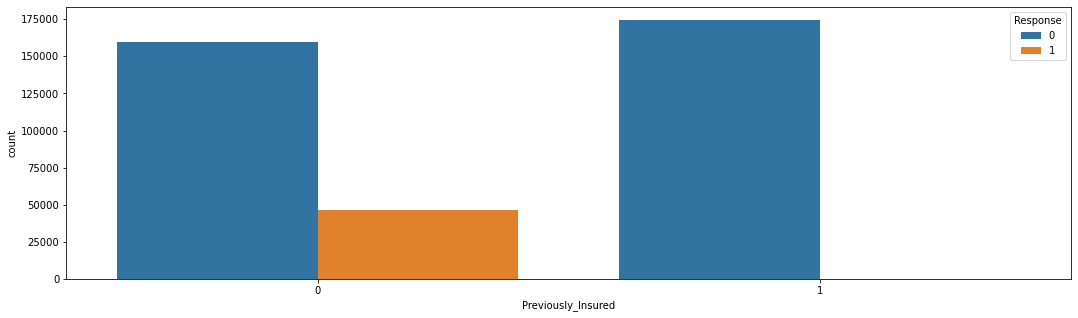

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Previously_Insured'], hue = df['Response'])
plt.show()

-hampir semua yang sebelumnya punya asuransi kendaraan, tidak tertarik terhadap asuransi kendaraan yang ditawarkan. sedangkan yang belum punya 23%nya tertarik

### Response vs Age
*Korelasi yang diperhitungkan dari analisis Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = 'Average Age', values = df['Age'], aggfunc='median')

col_0,Average Age
Response,
0,34
1,43


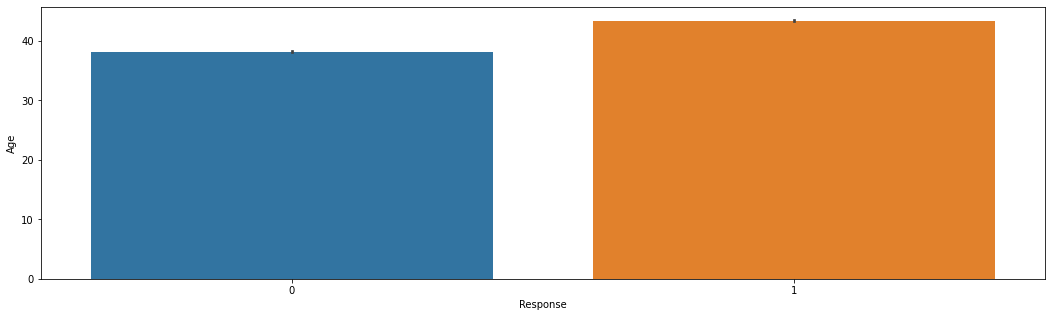

In [ ]:
plt.figure(figsize = (18, 5))
sns.barplot(x = df['Response'], y = df['Age'])
plt.show()

Rata-rata umur yang tertarik 43, sedangkan yang tidak tertarik 34

**A. korelasi masing-masing feature dan label:** <br>

usulan feature yang relevan dan dipertahankan <br>
- age <br>
- annual premium <br>
- previously insured <br>
- vehicle damage <br>
- vehicle age <br>
- gender



**B. korelasi antar feature:** <br>
Tidak ada feature yang redundant. <br>
Melakukan feature engineering pada **age dan annual premium** <br>

In [ ]:
#Number of Target for modelling
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Untuk data **response perlu penanganan akibat imbalance data** untuk kebutuhan modeling.

## Business Insight

### Insight 1: Quickwin bedasarkan data 'Vehicle_Age'


In [ ]:
df_vis1_1 = df.groupby("Vehicle_Age").agg({"id":"nunique"}).reset_index()
df_vis1_1 = df_vis1_1.reindex(index = [1,0,2])
df_vis1_1


,Vehicle_Age,id
1,< 1 Year,164786
0,1-2 Year,200316
2,> 2 Years,16007


In [ ]:
df_vis1_2 = pd.crosstab(index = df['Response'], columns = df['Vehicle_Age'], normalize = 'columns')
df_vis1_2 = df_vis1_2.T.reset_index()
df_vis1_2["Interested_%"] = df_vis1_2[1]*100
df_vis1_2 = df_vis1_2[["Vehicle_Age","Interested_%"]]
df_vis1_2


Response,Vehicle_Age,Interested_%
0,1-2 Year,17.375547
1,< 1 Year,4.370517
2,> 2 Years,29.374649


Text(50, 0.48, "Jumlah pelanggan dengan 'Vehicle_Age' lebih dari 2 tahun memang paling kecil,\n namun probabilitas ketertarikan terhadap vehicle insurance paling besar")

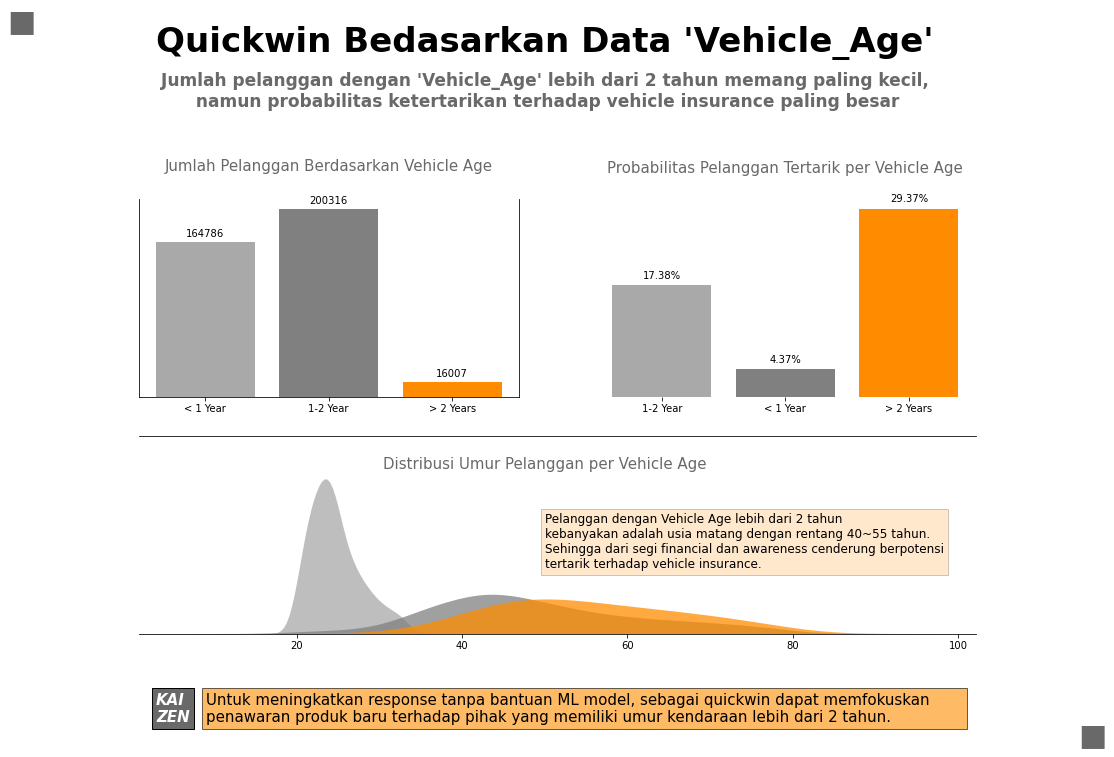

In [ ]:
fig = plt.figure(figsize=(15, 8))

# ------------------------------------------------------------------
ax1_1 = plt.subplot(221)
ax1_1.bar(df_vis1_1["Vehicle_Age"], df_vis1_1["id"], color=["darkgrey","grey","darkorange"])
ax1_1.spines[['top']].set_visible(False)
ax1_1.tick_params(left = False, labelleft = False)
for p in ax1_1.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax1_1.annotate(f'{(height)}', (x + width/2, y + height + 5000 ), ha='center', fontsize = 10)
ax1_1.text(1,240000,"Jumlah Pelanggan Berdasarkan Vehicle Age", fontsize = 15, ha = "center", color = "dimgray")

# ------------------------------------------------------------------
ax1_2 = plt.subplot(222)
ax1_2.bar(df_vis1_2["Vehicle_Age"], df_vis1_2["Interested_%"], color=["darkgrey","grey","darkorange"])
ax1_2.spines[:].set_visible(False)
ax1_2.tick_params(left = False, labelleft = False)
for p in ax1_2.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax1_2.annotate(f'{(height/100):.2%}', (x + width/2, y + height + 1 ), ha='center', fontsize = 10)
ax1_2.text(1,35,"Probabilitas Pelanggan Tertarik per Vehicle Age", fontsize = 15, ha = "center", color = "dimgray")


# ------------------------------------------------------------------
ax1_3 = plt.subplot(212)
##sns.kdeplot(data=df, x="Age",hue = "Vehicle_Age", bw_adjust=3)
sns.kdeplot(data=df[(df["Vehicle_Age"]=="< 1 Year")], x="Age",bw_adjust=3, multiple="stack", color = "darkgrey", edgecolor=None )
sns.kdeplot(data=df[(df["Vehicle_Age"]=="1-2 Year")], x="Age",bw_adjust=3, multiple="stack", color = "grey", edgecolor=None )
sns.kdeplot(data=df[(df["Vehicle_Age"]=="> 2 Years")], x="Age",bw_adjust=3, multiple="stack", color = "darkorange", edgecolor=None )
ax1_3.spines[["left","right"]].set_visible(False)
ax1_3.tick_params(left = False, labelleft = False)
ax1_3.set (ylabel=None) 
ax1_3.set (xlabel=None) 
ax1_3.set_ylim(0,0.18)
ax1_3.text(50,0.15,"Distribusi Umur Pelanggan per Vehicle Age", fontsize = 15, ha = "center", color = "dimgray")
ax1_3.text(50,0.06,"Pelanggan dengan Vehicle Age lebih dari 2 tahun\nkebanyakan adalah usia matang dengan rentang 40~55 tahun.\nSehingga dari segi financial dan awareness cenderung berpotensi\ntertarik terhadap vehicle insurance.", 
           fontsize = 12, ha = "left", bbox=dict(facecolor='darkorange', alpha=0.2))

ax1_3.text(9,-0.08,"Untuk meningkatkan response tanpa bantuan ML model, sebagai quickwin dapat memfokuskan       \npenawaran produk baru terhadap pihak yang memiliki umur kendaraan lebih dari 2 tahun.", 
           fontsize = 15, ha = "left", 
           bbox=dict(facecolor='darkorange',alpha=0.6))
ax1_3.text(3,-0.08,"KAI\nZEN", fontsize = 15, ha = "left", 
           weight = "bold", style = "italic", color = "white", bbox=dict(facecolor='dimgray'))

ax1_3.text(-15,0.55,"■", fontsize = 30, ha = "left", color = "dimgray")
ax1_3.text(118,-0.10,"■", fontsize = 30, ha = "right", color = "dimgray")

ax1_3.text(50,0.53,"Quickwin Bedasarkan Data 'Vehicle_Age'", fontsize = 34, ha = "center", weight = "bold")
ax1_3.text(50,0.48,"Jumlah pelanggan dengan 'Vehicle_Age' lebih dari 2 tahun memang paling kecil,\n namun probabilitas ketertarikan terhadap vehicle insurance paling besar", 
           fontsize = 17, ha = "center", weight = "bold", color = "dimgray")

Dari customer dengan umur kendaraan <1 tahun yang tertarik dengan asuransi kendaraan hanya 4%, namun semakin tua umur kendaraan customer kertertarikannya semakin meningkat.

Berdasarkan analisa distribusi dari 'Age' di masing-masing kondisi 'Vehicle_Age' dapat terlihat bahwa,
<ul>
<li>'Vehicle_Age' dengan kondisi kurang dari 1 tahun memiliki distribusi paling tinggi di rentang 23-26 tahun</li> 
<li>'Vehicle_Age' dengan kondisi 1-2 tahun memiliki distribusi paling tinggi di rentang 40-45 tahun</li> 
<li>'Vehicle_Age' dengan kondisi lebih dari 2 tahun memiliki distribusi paling tinggi di umur 40, 50 dan 53 Tahun</li> 
</ul>

Kalau dilihat dari total datanya, urutan dari paling banyak ke terkecil berada pada kategori
<ul>
<li>'Vehicle_Age' 1-2 Tahun</li>
<li>'Vehicle_Age' kurang dari 1 Tahun</li>
<li>'Vehicle_Age' lebih dari 2 Tahun</li>
</ul>

Namun Jika kita melihat untuk yang memiliki relasi tertinggi terhadap 'Response', 'Vehicle_Age' lebih dari 2 tahun adalah kategori yang memiliki persentase 'Response' paling tinggi


**Rekomendasi** <br>
Dengan data ini dapat disimpulkan bahwa, untuk tujuan meningkatkan response tanpa bantuan machine learning model sebagai quickwin untuk tetap melakukan operasi penawaran terhadap produk baru bisa difokuskan ke pihak yang memiliki umur kendaraan lebih dari 2 tahun


### Insight 2: Quickwin berdasarkan data 'Previously_Insured'

Text(-0.45, -97000, 'Fokus menawarkan ke customer yang belum memiliki asuransi kendaraan atau umur kendaraan >1 tahun, karena jika melihat customer \nyang sudah memiliki asuransi kendaraan ataupun memiliki umur kendaraan <1 tahun, hampir pasti tidak akan tertarik (menolak).')

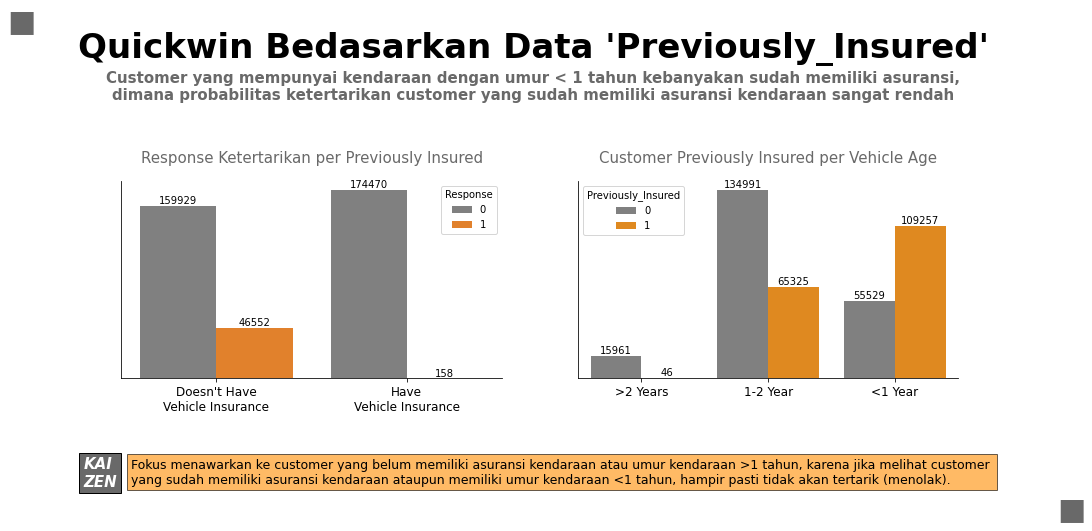

In [ ]:
fig = plt.figure(figsize=(15, 8))


# ------------------------------------------------------------------
ax2_1 = plt.subplot(221)
sns.countplot(df['Previously_Insured'], hue = df['Response'], palette = ["gray","tab:orange"])
ax2_1.spines[["right","top"]].set_visible(False)
ax2_1.tick_params(left = False, labelleft = False)
ax2_1.set (ylabel=None)
ax2_1.set (xlabel=None)
ax2_1.set_xticklabels(["Doesn't Have\nVehicle Insurance", 'Have\nVehicle Insurance'], fontsize = 12)
for p in ax2_1.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax2_1.annotate(f'{(height)}', (x + width/2, y + height + 2000), ha='center')
ax2_1.text(0.5,200000,"Response Ketertarikan per Previously Insured", fontsize = 15, ha = "center", color = "dimgray")

# ------------------------------------------------------------------
ax2_2 = plt.subplot(222)
sns.countplot(df['Vehicle_Age'], hue = df['Previously_Insured'],palette = ["gray","darkorange"])
ax2_2.spines[["right","top"]].set_visible(False)
ax2_2.tick_params(left = False, labelleft = False)
ax2_2.set (ylabel=None)
ax2_2.set (xlabel=None)
ax2_2.set_xticklabels([">2 Years","1-2 Year","<1 Year"], fontsize = 12)
for p in ax2_2.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax2_2.annotate(f'{(height)}', (x + width/2, y + height + 2000 ), ha='center')
ax2_1.text(2.9,200000,"Customer Previously Insured per Vehicle Age", fontsize = 15, ha = "center", color = "dimgray")
        
ax2_2.text(-5,250000,"■", fontsize = 30, ha = "left", color = "dimgray")
ax2_2.text(3.5,-100000,"■", fontsize = 30, ha = "right", color = "dimgray")

ax2_2.text(-0.85,230000,"Quickwin Bedasarkan Data 'Previously_Insured'", fontsize = 34, ha = "center", weight = "bold")
ax2_2.text(-0.85,200000,"Customer yang mempunyai kendaraan dengan umur < 1 tahun kebanyakan sudah memiliki asuransi,\ndimana probabilitas ketertarikan customer yang sudah memiliki asuransi kendaraan sangat rendah", 
           fontsize = 15, ha = "center", weight = "bold", color = "dimgrey")

ax2_1.text(-0.7,-100000,"KAI\nZEN", fontsize = 15, ha = "left", 
           weight = "bold", style = "italic", color = "white", bbox=dict(facecolor='dimgray'))
ax2_1.text(-0.45,-97000,"Fokus menawarkan ke customer yang belum memiliki asuransi kendaraan atau umur kendaraan >1 tahun, karena jika melihat customer \nyang sudah memiliki asuransi kendaraan ataupun memiliki umur kendaraan <1 tahun, hampir pasti tidak akan tertarik (menolak).", 
           fontsize = 12.5, ha = "left", 
           bbox=dict(facecolor='darkorange',alpha=0.6))


Customer asuransi kesehatan yang mempunyai kendaraan dengan umur < 1 tahun kebanyakan sudah memiliki asuransi (data menunjukkan nilai sebesar 66%), sedangkan yang memiliki umur kendaraan >2 tahun hanya 2%. <br>
Sehingga itu bisa menjadi sebab customer dengan umur kendaraan >2 tahun lebih berminat/tertarik terhadap asuransi kesehatan yang ditawarkan.

**Rekomendasi** <br>
Fokus menawarkan hanya kepada customer yang belum memiliki asuransi kendaraan atau customer dengan umur kendaraan >1 tahun karena jika melihat customer yang sudah memiliki asuransi kendaraan ataupun memiliki umur kendaraan <1 tahun, hampir pasti tidak akan tertarik (menolak).

### Insight 3: Quickwin berdasarkan data 'Vehicle Damage'

Text(-2.35, -100000, 'Fokus menawarkan kepada customer yang pernah mengalami kerusakan kendaraan, serta memberikan\nsosialisasi pentingnya asuransi kendaraan.')

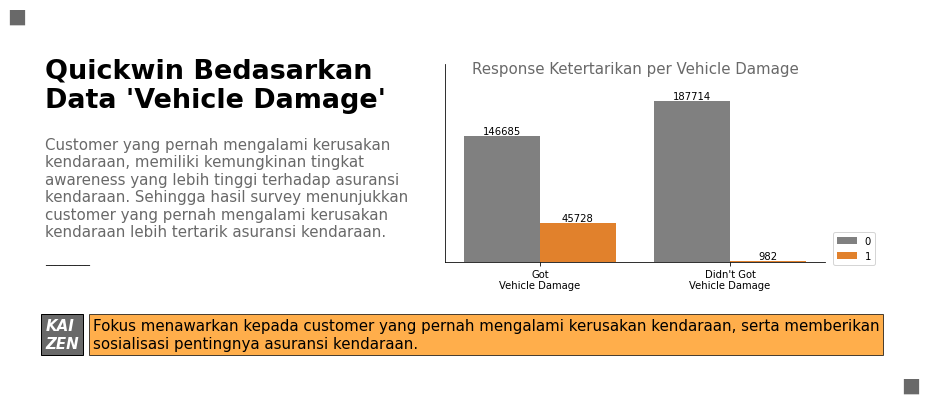

In [ ]:
fig = plt.figure(figsize=(15, 8))


# ------------------------------------------------------------------
ax3_1 = plt.subplot(221)
sns.countplot(df['Vehicle_Damage'], hue = df['Response'], palette = ["gray","tab:orange"])
ax3_1.spines[["right","top"]].set_visible(False)
ax3_1.tick_params(left = False, labelleft = False)
ax3_1.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)
ax3_1.set_ylim(0,230000)
ax3_1.set (ylabel=None)
ax3_1.set (xlabel=None)
ax3_1.set_xticklabels(["Got\nVehicle Damage", "Didn't Got\nVehicle Damage"], fontsize = 10)
for p in ax3_1.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax3_1.annotate(f'{(height)}', (x + width/2, y + height + 2000), ha='center')
ax3_1.text(0.5,220000,"Response Ketertarikan per Vehicle Damage", fontsize = 15, ha = "center", color = "dimgrey")
ax3_1.text(-2.8,280000,"■", fontsize = 20, ha = "left", color = "dimgray")
ax3_1.text(2,-150000,"■", fontsize = 20, ha = "right", color = "dimgray")
ax3_1.text(-2.6,180000,"Quickwin Bedasarkan\nData 'Vehicle Damage'", fontsize = 27, ha = "left", weight = "bold")
ax3_1.text(-2.6,30000,"Customer yang pernah mengalami kerusakan\nkendaraan, memiliki kemungkinan tingkat\nawareness yang lebih tinggi terhadap asuransi\nkendaraan. Sehingga hasil survey menunjukkan\ncustomer yang pernah mengalami kerusakan\nkendaraan lebih tertarik asuransi kendaraan.", 
           fontsize = 15, ha = "left", color = "dimgrey" )
ax3_1.text(-2.6,0,"_________", fontsize = 10, ha = "left")

ax3_1.text(-2.6,-100000,"KAI\nZEN", fontsize = 15, ha = "left", 
           weight = "bold", style = "italic", color = "white", bbox=dict(facecolor='dimgray'))
ax3_1.text(-2.35,-100000,"Fokus menawarkan kepada customer yang pernah mengalami kerusakan kendaraan, serta memberikan\nsosialisasi pentingnya asuransi kendaraan.", 
           fontsize = 15, ha = "left", 
           bbox=dict(facecolor='darkorange',alpha=0.7))

Customer yang pernah mengalami kerusakan kendaraan, memiliki kemungkinan tingkat awareness yang lebih tinggi terhadap asuransi kendaraan. Sehingga hasil survey menunjukkan customer yang pernah mengalami kerusakan kendaraan lebih tertarik.


**Rekomendasi:**

Fokus menawarkan kepada customer yang pernah mengalami kerusakan kendaraan, serta memberikan sosialisasi pentingnya asuransi kendaraan.

# **Stage 2 - Preprocessing**

In [ ]:
#Manipulation
import numpy as np
import pandas as pd
import scipy
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#Warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

#Preparation install
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn import set_config

#Documentation
#import torch

In [ ]:
df = pd.read_csv('train.csv')
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


## Feature Extraction

Feature extraction yang bisa dilakukan di dataset: 
</br> 1. mengubah kolom Vintage dari yang tadinya bersatuan hari menjadi bulan.
</br> 2. melakukan binning pada kolom Age dan Annual_Premium.

### Vintage

In [ ]:
df['Vintage_mon'] = round(df['Vintage']/30)
df[['Vintage', 'Vintage_mon']]

,Vintage,Vintage_mon
0,217,7.0
1,183,6.0
2,27,1.0
3,203,7.0
4,39,1.0
...,...,...
381104,88,3.0
381105,131,4.0
381106,161,5.0
381107,74,2.0


In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_mon
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,7.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,6.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,7.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,3.0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,4.0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,5.0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,2.0


### Age

</br>Binning untuk age dilakukan dengan cara mengelompokkan usia ke dalam kategori per 15 tahun. Angka 20 adalah usia termuda di dataset ini. 

In [ ]:
#binning for age
bins= [20,35,50,65,80,95]
labels = ['1','2','3','4','5']
df['Age_cat'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age_cat'].value_counts()

1    181876
2    104426
3     63947
4     29822
5      1038
Name: Age_cat, dtype: int64

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_mon,Age_cat
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,7.0,2
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,6.0,4
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1.0,2
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,7.0,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,3.0,4
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,4.0,1
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,5.0,1
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,2.0,4


### Annual_Premium

In [ ]:
category = ['Silver', 'Bronze', 'Gold', 'Platinum']

bins = np.linspace(min(df['Annual_Premium']), 62011, 5)
bins[4] = max(df['Annual_Premium'])
df['Annual_Membership'] = pd.cut(df['Annual_Premium'], bins, labels=category, include_lowest=True)
df['Annual_Membership'].value_counts()

Gold        137707
Bronze      133461
Silver       66554
Platinum     43387
Name: Annual_Membership, dtype: int64

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_mon,Age_cat,Annual_Membership
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,7.0,2,Gold
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,6.0,4,Gold
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1.0,2,Gold
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,7.0,1,Bronze
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1.0,1,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,3.0,4,Bronze
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,4.0,1,Gold
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,5.0,1,Gold
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,2.0,4,Gold


## Feature Selection

Dari dataset, memilih feature mana saja yang akan digunakan untuk modelling. Ada 2 metode yang akan digunakan. 

### Chi Square


Metode Chi Square digunakan untuk memilih feature kategorik sedangkan targetnya kategorik. 

<AxesSubplot:>

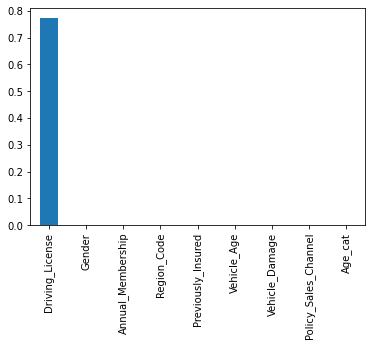

In [ ]:
Cats = ["Gender","Driving_License","Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Policy_Sales_Channel","Age_cat","Annual_Membership"]
df_cats = df[Cats]
df_cats = df_cats.astype(str)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cats['Gender'] = label_encoder.fit_transform(df_cats['Gender'])
df_cats['Region_Code'] = label_encoder.fit_transform(df_cats['Region_Code'])
df_cats['Vehicle_Age'] = label_encoder.fit_transform(df_cats['Vehicle_Age'])
df_cats['Vehicle_Damage'] = label_encoder.fit_transform(df_cats['Vehicle_Damage'])
df_cats['Annual_Membership'] = label_encoder.fit_transform(df_cats['Annual_Membership'])

from sklearn.feature_selection import chi2
X = df_cats
y = df['Response']

chi_scores = chi2(X,y)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

### Anova

Metode Anova digunakan untuk memilih feature numerik sedangkan targetnya kategorik.

Feature 0: 0.575601
Feature 1: 0.740447
Feature 2: 3229.622469
Feature 3: 155.953111


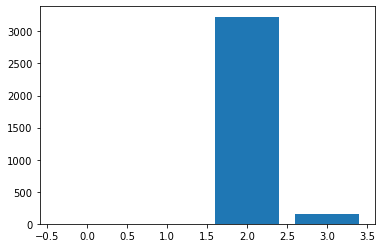

In [ ]:
nums = ["Vintage_mon", "Vintage", "Age", "Annual_Premium"]
df_nums = df[nums]

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X = df_nums
y = df["Response"]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

</br> Feature yang **akan digunakan** berdasarkan masing-masing metode:
</br>
</br> **Chi Square**
</br> - Gender
</br> - Annual_Membership
</br> - Region_Code
</br> - Previously_Insured
</br> - Vehicle_Age
</br> - Vehicle_Damage
</br> - Policy_Sales_Channel
</br> - Age_cat
</br> **Anova**
</br> - Age
</br> - Annual_Premium

Dengan demikian, maka feature yang tidak terpilih (Driving_License, Vintage, Vintage_mon dan juga id) akan di-drop dari dataset.


In [ ]:
## Drop Feature
df_st2 = df.drop(["Driving_License", "Vintage_mon", "id"], axis = 1)
df_st2

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_cat,Annual_Membership
0,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2,Gold
1,Male,76,3.0,0,1-2 Year,No,33536.0,26.0,183,0,4,Gold
2,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2,Gold
3,Male,21,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1,Bronze
4,Female,29,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,26.0,1,1-2 Year,No,30170.0,26.0,88,0,4,Bronze
381105,Male,30,37.0,1,< 1 Year,No,40016.0,152.0,131,0,1,Gold
381106,Male,21,30.0,1,< 1 Year,No,35118.0,160.0,161,0,1,Gold
381107,Female,68,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,4,Gold


## Train/Test Split Data

In [ ]:
X = df_st2.drop(["Response"], axis = 1)
y = df_st2["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = df["Response"], random_state=123)

In [ ]:
print("X_train size : ",X_train.size)
print("X_test size  : ",X_test.size)
print("y_train size : ",y_train.size)
print("y_test size  : ",y_test.size)

X_train size :  2934536
X_test size  :  1257663
y_train size :  266776
y_test size  :  114333


## Handling Missing Data & Duplicates

In [ ]:
num = ["Age", "Annual_Premium"]
nom = ["Gender", "Region_Code", "Policy_Sales_Channel"]
ordi = ["Previously_Insured", "Vehicle_Age", "Vehicle_Damage"]

X_train_num = X_train[num]
X_train_nom = X_train[nom]
X_train_ordi = X_train[ordi]

X_train_nom = X_train_nom.astype(str)
X_train_ordi = X_train_ordi.astype(str)

In [ ]:
X_train.isna().sum()

Gender                  0
Age                     0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Age_cat                 0
Annual_Membership       0
dtype: int64

In [ ]:
column1 = ["Gender","Age_cat", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Annual_Membership","Policy_Sales_Channel"]
column2 = num + nom + ordi
df[df.duplicated(subset= column1, keep = False)== True].sort_values(column1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_mon,Age_cat,Annual_Membership
229133,229134,Female,33,1,0.0,0,1-2 Year,No,2630.0,26.0,128,0,4.0,1,Silver
336182,336183,Female,33,1,0.0,0,1-2 Year,No,2630.0,26.0,71,0,2.0,1,Silver
2217,2218,Female,33,1,0.0,0,1-2 Year,No,2630.0,60.0,191,0,6.0,1,Silver
46962,46963,Female,31,1,0.0,0,1-2 Year,No,2630.0,60.0,148,0,5.0,1,Silver
88679,88680,Female,32,1,0.0,0,1-2 Year,No,2630.0,60.0,50,0,2.0,1,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297795,297796,Male,80,1,50.0,1,1-2 Year,No,37241.0,8.0,265,0,9.0,5,Gold
60887,60888,Male,80,1,50.0,1,1-2 Year,No,55368.0,8.0,36,0,1.0,5,Platinum
303703,303704,Male,80,1,50.0,1,1-2 Year,No,59432.0,8.0,128,0,4.0,5,Platinum
305355,305356,Male,80,1,50.0,1,1-2 Year,Yes,37792.0,26.0,205,0,7.0,5,Gold


In [ ]:
df.duplicated().sum()

0

## Handling Outliers

Handling outlier dilakukan pada feature Annual_Premium yang belum di-binning. 

### Annual Premium

In [ ]:
#berdasar IQR
Q1 =X_train['Annual_Premium'].quantile(0.25)
Q3 =X_train['Annual_Premium'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_1 = ((X_train['Annual_Premium'] >=low_limit)&(X_train['Annual_Premium']<=high_limit))
df_1=X_train[filtered_1]
df_1

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_cat,Annual_Membership
121993,Female,25,11.0,1,< 1 Year,No,25455.0,152.0,140,1,Bronze
230417,Female,41,3.0,0,1-2 Year,Yes,29302.0,154.0,256,2,Bronze
353590,Female,39,28.0,1,1-2 Year,No,22713.0,124.0,48,2,Bronze
363236,Female,27,11.0,1,< 1 Year,No,28847.0,152.0,229,1,Bronze
85749,Male,21,8.0,1,< 1 Year,No,56416.0,160.0,98,1,Platinum
...,...,...,...,...,...,...,...,...,...,...,...
238838,Male,47,3.0,0,1-2 Year,Yes,33905.0,124.0,34,2,Gold
306243,Female,42,28.0,0,1-2 Year,Yes,40918.0,122.0,204,2,Gold
266889,Female,24,15.0,0,< 1 Year,Yes,2630.0,152.0,72,1,Silver
230244,Male,23,46.0,1,< 1 Year,No,39842.0,152.0,49,1,Gold


<AxesSubplot:xlabel='Annual_Premium'>

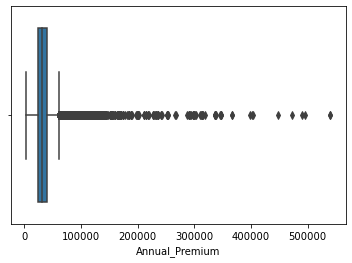

In [ ]:
sns.boxplot(x=X_train['Annual_Premium'])

<AxesSubplot:xlabel='Annual_Premium'>

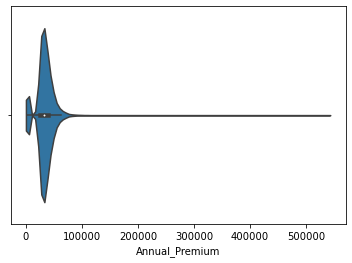

In [ ]:
sns.violinplot(x=X_train['Annual_Premium'])

In [ ]:
print ('batas atas Annual Premium=', high_limit)

batas atas Annual Premium= 61873.875


In [ ]:
a=X_train[X_train['Annual_Premium']>=high_limit]
a.sort_values(by='Annual_Premium',ascending=False)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_cat,Annual_Membership
144282,Female,53,28.0,1,1-2 Year,No,540165.0,26.0,134,3,Platinum
54743,Male,26,28.0,0,< 1 Year,Yes,540165.0,156.0,245,1,Platinum
347413,Female,30,28.0,0,< 1 Year,Yes,495106.0,152.0,185,1,Platinum
172257,Male,40,28.0,0,1-2 Year,Yes,489663.0,122.0,297,2,Platinum
281679,Female,45,28.0,0,1-2 Year,Yes,472042.0,26.0,155,2,Platinum
...,...,...,...,...,...,...,...,...,...,...,...
176218,Male,24,8.0,0,< 1 Year,No,61878.0,152.0,295,1,Platinum
38997,Female,22,8.0,0,< 1 Year,No,61876.0,152.0,147,1,Platinum
176032,Female,25,28.0,1,< 1 Year,No,61876.0,152.0,227,1,Platinum
291669,Male,44,8.0,0,> 2 Years,Yes,61876.0,124.0,261,2,Platinum


In [ ]:
print ('jumlah data awal pada data train=', len (X_train))
print ('jumlah outlier awal pada data train=', (len(X_train)-len(df_1)))
outlier_Annual_Premium= ((len(X_train)-len(df_1))/len(X_train))*100
print ('presentase outlier Annual Premium pada data train=', round(outlier_Annual_Premium,2),'%')

jumlah data awal pada data train= 266776
jumlah outlier awal pada data train= 7269
presentase outlier Annual Premium pada data train= 2.72 %


In [ ]:
#preview data-data untuk Annual Premium pada X_test
X_test_highlimit=X_test[X_test['Annual_Premium']>=high_limit]
X_test_highlimit.sort_values(by='Annual_Premium',ascending=False)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_cat,Annual_Membership
268332,Male,46,28.0,0,1-2 Year,Yes,540165.0,124.0,59,2,Platinum
190154,Male,47,28.0,0,1-2 Year,Yes,540165.0,42.0,24,2,Platinum
11319,Female,50,46.0,1,1-2 Year,No,508073.0,26.0,192,3,Platinum
136304,Male,50,28.0,0,1-2 Year,Yes,472042.0,124.0,14,3,Platinum
275442,Male,22,28.0,0,1-2 Year,Yes,472042.0,163.0,114,1,Platinum
...,...,...,...,...,...,...,...,...,...,...,...
43505,Female,70,28.0,1,1-2 Year,No,61893.0,26.0,195,4,Platinum
249017,Female,25,28.0,1,< 1 Year,No,61893.0,152.0,17,1,Platinum
81886,Male,23,28.0,0,< 1 Year,Yes,61893.0,152.0,128,1,Platinum
147976,Male,25,46.0,1,< 1 Year,No,61892.0,152.0,60,1,Platinum


Tidak ada data yang didrop karena data tersebut masih tergolong collective outlier, serta tidak ada data outlier yang disubtitusi nilainya karena tidak ingin kehilangan informasi di rentang annual premium yang lebih tinggi.

## Class Imbalance

Handling Imbalance data akan dilakukan stage Model Machine Learning menggunakan class weight feature. 

[Penjelasan lebih lanjut terkait 'Class Weight Parameter'](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/)

## Feature Transform & Encoding

### Numeric Pipe

In [ ]:
# var numeric
num_var = ['Age','Annual_Premium']

# preprocessing steps
scaler = StandardScaler(with_std=True) #digunakan standardisasi karena lebih robust terhadap outlier, sedangkan normalisasi lebih sensitif terhadap outlier
power = PowerTransformer(method='yeo-johnson') #works with positive and negative values

# numeric pipe
numeric_pipe = Pipeline([
    ('scaler', scaler),
    ('power', power)
]) 

###Age saja

In [ ]:
# var numeric
age_var = ['Age']

# preprocessing steps
scaler = StandardScaler(with_std=True) #digunakan standardisasi karena lebih robust terhadap outlier, sedangkan normalisasi lebih sensitif terhadap outlier
power = PowerTransformer(method='yeo-johnson') #works with positive and negative values

# numeric pipe
age_pipe = Pipeline([
    ('scaler', scaler),
    ('power', power)
]) 

### Categoric Pipe

In [ ]:
# var categoric
cat_var = ['Gender','Vehicle_Damage','Previously_Insured']

# preprocessing steps 
oh_encoder = OneHotEncoder(handle_unknown='ignore',drop='first') #mencegah multicollinearity

# categoric pipe
cat_pipe = Pipeline([
    ('oh_encoder', oh_encoder)
]) 

### Binary Pipe

In [ ]:
# var categoric
bin_var = ['Policy_Sales_Channel','Region_Code']

# preprocessing steps
bin_encoder = ce.BinaryEncoder(cols=['Policy_Sales_Channel','Region_Code'],return_df=(True))

# binary pipe
bin_pipe = Pipeline([
    ('bin_encoder',bin_encoder)
])

### Ordinal Pipe

In [ ]:
# var categoric
ord_var_vage = ['Vehicle_Age']

# preprocessing steps
vehicle_age_levels = ['< 1 Year', '1-2 Year', '> 2 Years']
ord_encoder = OrdinalEncoder(categories=[vehicle_age_levels], dtype=int)

#ordinal pipe
ord_pipe = Pipeline([
    ('ord_encoder',ord_encoder)])

#var categoric
ord_var_age = ['Age_cat']
# preprocessing steps
age_levels = ['1','2', '3', '4', '5']
ord_encoder_1 = OrdinalEncoder(categories=[age_levels], dtype=int)

#ordinal pipe
ord_pipe_1 = Pipeline([
    ('ord_encoder_1',ord_encoder_1)])

#var categoric
ord_var_anp = ['Annual_Membership']
# preprocessing steps
anp_levels = ['Silver', 'Bronze', 'Gold', 'Platinum']
ord_encoder_2 = OrdinalEncoder(categories=[anp_levels], dtype=int)

# ordinal pipe
ord_pipe_2 = Pipeline([
    ('ord_encoder_2',ord_encoder_2)])

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric_pipe', numeric_pipe, num_var),
    ('categoric_pipe', cat_pipe, cat_var),
    ('bin_pipe',bin_pipe, bin_var),
    ('ord_pipe',ord_pipe, ord_var_vage),
    ('ord_pipe_1',ord_pipe_1, ord_var_age),
    ('ord_pipe_2',ord_pipe_2, ord_var_anp)
])

In [ ]:
#only age numerik and anual membership kategorik (drop = age kategorik and annual premium numerik)
preprocessor1 = ColumnTransformer([
    ('age_pipe', age_pipe, age_var),
    ('categoric_pipe', cat_pipe, cat_var),
    ('bin_pipe',bin_pipe, bin_var),
    ('ord_pipe',ord_pipe, ord_var_vage),
    ('ord_pipe_2',ord_pipe_2, ord_var_anp)
])

In [ ]:
#ony age numerik and annual premium numerik (drop = age kategorik dan annual membership kategorik)

preprocessor2 = ColumnTransformer([
    ('numeric_pipe', numeric_pipe, num_var),
    ('categoric_pipe', cat_pipe, cat_var),
    ('bin_pipe',bin_pipe, bin_var),
    ('ord_pipe',ord_pipe, ord_var_vage)
])

## Hasil Feature Encoding & Transformation 

In [ ]:
X_train_result=pd.DataFrame(preprocessor.fit_transform(X_train))
X_train_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.946879,-0.261516,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.366362,-0.028939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.236563,-0.430851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,-0.750448,-0.056116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.364742,1.463324,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,0.708598,0.240644,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
266772,0.427890,0.635720,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0
266773,-1.048260,-1.739779,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
266774,-1.151714,0.576127,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0


Keterangan:

Kolom 0: Age
</br>Kolom 1: Annual_Premium
</br>Kolom 2: Gender
</br>Kolom 3: Vehicle_Damage
</br>Kolom 4: Previously_Insured
</br>Kolom 5-12: Policy_Sales_Channel
</br>Kolom 13-18: Region_Code
</br>Kolom 19: Vehicle_Age
</br>Kolom 20: Age_cat
</br>Kolom 21: Anual_Membership

## Feature Tambahan

1.   **Jumlah kendaraan yang dimiliki**
</br>Semakin banyak kendaraan semakin banyak biaya operasional yang perlu dikeluarkan, sehingga kemungkinan akan mempengaruhi keputusan pelanggan untuk membeli asuransi kendaraan.

2.   **Kepemilikan utang/loan/credit score**
</br>Semakin banyak utang pelanggan kemungkinan akan mempengaruhi keputusannya untuk membeli asuransi kendaraan.

3.   **Jumlah anak**
</br>Semakin banyak anak semakin banyak biaya operasional yang perlu dikeluarkan, sehingga kemungkinan akan mempengaruhi keputusan membeli asuransi kendaraan. 

4.   **Tipe mobil** 
</br>Model mobil yang bergengsi /prestigious memiliki kemungkinan akan mempengaruhi keputusan pelanggan untuk membeli asuransi kendaraan. 

5.   **Pekerjaan**
</br>Pelanggan yang memiliki tipe pekerjaan yang mobile dengan kendaraan memiliki kemungkinan untuk membeli asuransi kendaraan.

# **Stage 3 - Supervised Learning**

In [ ]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
X_test_result=pd.DataFrame(preprocessor.transform(X_test))
X_test_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.601150,2.162857,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0
1,0.907845,-0.021072,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0
2,0.427890,1.794248,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0
3,-1.257216,-0.766470,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.491103,1.502686,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114328,-0.383753,0.162147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
114329,-0.847599,0.909471,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
114330,-0.132717,-1.739779,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
114331,-0.750448,-1.739779,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_train

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_cat,Annual_Membership
121993,Female,25,11.0,1,< 1 Year,No,25455.0,152.0,140,1,Bronze
230417,Female,41,3.0,0,1-2 Year,Yes,29302.0,154.0,256,2,Bronze
353590,Female,39,28.0,1,1-2 Year,No,22713.0,124.0,48,2,Bronze
363236,Female,27,11.0,1,< 1 Year,No,28847.0,152.0,229,1,Bronze
85749,Male,21,8.0,1,< 1 Year,No,56416.0,160.0,98,1,Platinum
...,...,...,...,...,...,...,...,...,...,...,...
238838,Male,47,3.0,0,1-2 Year,Yes,33905.0,124.0,34,2,Gold
306243,Female,42,28.0,0,1-2 Year,Yes,40918.0,122.0,204,2,Gold
266889,Female,24,15.0,0,< 1 Year,Yes,2630.0,152.0,72,1,Silver
230244,Male,23,46.0,1,< 1 Year,No,39842.0,152.0,49,1,Gold


In [ ]:
X_train_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.946879,-0.261516,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.366362,-0.028939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.236563,-0.430851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,-0.750448,-0.056116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.364742,1.463324,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,0.708598,0.240644,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
266772,0.427890,0.635720,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0
266773,-1.048260,-1.739779,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
266774,-1.151714,0.576127,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0


In [ ]:
X_test

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_cat,Annual_Membership
128273,Male,45,28.0,0,> 2 Years,Yes,70184.0,44.0,156,2,Platinum
293666,Male,51,28.0,1,1-2 Year,No,29434.0,26.0,224,3,Bronze
51048,Male,42,28.0,0,> 2 Years,Yes,62862.0,124.0,37,2,Platinum
148668,Male,22,30.0,1,< 1 Year,No,17397.0,152.0,20,1,Silver
323007,Male,65,39.0,0,1-2 Year,No,57176.0,127.0,83,4,Platinum
...,...,...,...,...,...,...,...,...,...,...,...
367011,Female,31,30.0,1,< 1 Year,No,32548.0,152.0,86,1,Gold
124784,Female,26,28.0,0,< 1 Year,Yes,45935.0,152.0,177,1,Gold
168882,Male,34,48.0,0,1-2 Year,Yes,2630.0,154.0,38,1,Silver
132752,Male,27,30.0,0,< 1 Year,Yes,2630.0,152.0,271,1,Silver


In [ ]:
X_test_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.601150,2.162857,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0
1,0.907845,-0.021072,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0
2,0.427890,1.794248,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0
3,-1.257216,-0.766470,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.491103,1.502686,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114328,-0.383753,0.162147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
114329,-0.847599,0.909471,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
114330,-0.132717,-1.739779,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
114331,-0.750448,-1.739779,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


scaling class weight for XGB : 

response no = 234079 <br />
response yes = 32697 <br />
jadi, scale_pos_weight = 7.159035997186286

In [ ]:
response_no=234079
response_yes=32697
spw=response_no/response_yes
print('scale_pos_weight=', spw)

scale_pos_weight= 7.159035997186286


In [ ]:
models1 = [
    ['LogisticRegression', LogisticRegression(class_weight='balanced')],
    ['DecisionTree', DecisionTreeClassifier(class_weight='balanced',random_state=123)],
    ['XGB',XGBClassifier(scale_pos_weight=spw,random_state=123)],
    ['RandomForest',RandomForestClassifier(class_weight='balanced',random_state=123)],
    ['Adaboost',AdaBoostClassifier(random_state=123)]
    ]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def cross_validation2(model, Xtrain, ytrain):
  model_name = []

  training_accuracy = []
  cv_accuracy_mean = []
  cv_accuracy_std = []

  training_precision = []
  cv_precision_mean = []
  cv_precision_std = []

  training_recall=[]
  cv_recall_mean=[]
  cv_recall_std=[]

  training_f1_score = []
  cv_f1_score_std = []
  cv_f1_score_mean = []

  training_roc_auc = []
  cv_roc_auc_std = []
  cv_roc_auc_mean = []
  for name, model in models1:

    pipeline = Pipeline ([
        ('preprocessor',preprocessor2),
        ('model',model)
    ])
    model_name.append(name)

    # scoring
    scoring=['accuracy','precision','recall','f1','roc_auc']

    # test
    cv_score= cross_validate(pipeline, Xtrain, ytrain, scoring=scoring, cv=5, n_jobs=-1,return_train_score=True)

    cv_accuracy_mean.append(cv_score['test_accuracy'].mean())
    cv_accuracy_std.append(cv_score['test_accuracy'].std())

    cv_precision_mean.append(cv_score['test_precision'].mean())
    cv_precision_std.append(cv_score['test_precision'].std())

    cv_recall_mean.append(cv_score['test_recall'].mean())
    cv_recall_std.append(cv_score['test_recall'].std())

    cv_f1_score_mean.append(cv_score['test_f1'].mean())
    cv_f1_score_std.append(cv_score['test_f1'].std())

    cv_roc_auc_mean.append(cv_score['test_roc_auc'].mean())
    cv_roc_auc_std.append(cv_score['test_roc_auc'].std())

    #training
    pipeline.fit (X_train,y_train)
    y_pred = pipeline.predict(X_train)
    training_accuracy.append(accuracy_score(y_train,y_pred))
    training_precision.append(precision_score(y_train,y_pred))
    training_recall.append(recall_score(y_train,y_pred))
    training_f1_score.append(f1_score(y_train,y_pred))
    training_roc_auc.append(roc_auc_score(y_train,y_pred))

  return pd.DataFrame ({
      'Model': model_name,
      'Training accuracy' : training_accuracy,
      'CV accuracy mean' : cv_accuracy_mean,
      'CV accuracy std' : cv_accuracy_std,
      'Training precision' : training_precision,
      'CV precision mean' : cv_precision_mean,
      'CV precision std' : cv_precision_std,
      'Training recall': training_recall,
      'CV recall mean': cv_recall_mean,
      'CV recall std': cv_recall_std,
      'Training F1 Score' : training_f1_score,
      'CV F1 Score mean' : cv_f1_score_mean,
      'CV F1 Score std' : cv_f1_score_std,
      'Training ROC AUC' : training_roc_auc,
      'CV ROC AUC mean' : cv_roc_auc_mean,
      'CV ROC AUC std' : cv_roc_auc_std,

  })

## Model Comparison with Cross Validation

In [ ]:
## Pakai age sama annual premium
X_train2 = X_train.drop(['Age_cat','Annual_Membership'], axis=1)
y_train2 = y_train

In [ ]:
cv_result2 = cross_validation2(models1,X_train2, y_train2)
cv_result2

,Model,Training accuracy,CV accuracy mean,CV accuracy std,Training precision,CV precision mean,CV precision std,Training recall,CV recall mean,CV recall std,Training F1 Score,CV F1 Score mean,CV F1 Score std,Training ROC AUC,CV ROC AUC mean,CV ROC AUC std
0,LogisticRegression,0.646441,0.645440,0.001621,0.253401,0.252939,0.000934,0.968346,0.968927,0.002318,0.401687,0.401155,0.001254,0.784911,0.831514,0.001979
1,DecisionTree,0.980302,0.822889,0.001798,0.861993,0.291781,0.004327,0.999266,0.311711,0.003203,0.925568,0.301400,0.003163,0.988459,0.603940,0.001782
2,XGB,0.720916,0.713790,0.001439,0.297952,0.287508,0.001153,0.941615,0.903263,0.004365,0.452668,0.436178,0.001587,0.815851,0.853729,0.001057
3,RandomForest,0.983649,0.843610,0.000553,0.889935,0.316505,0.002436,0.988898,0.238034,0.003801,0.936810,0.271707,0.003102,0.985907,0.810387,0.000790
4,Adaboost,0.877369,0.877414,0.000042,0.050000,0.347143,0.257524,0.000031,0.000336,0.000263,0.000061,0.000672,0.000525,0.499975,0.848072,0.001280


In [ ]:
X_test2=X_test.drop(['Age_cat','Annual_Membership'], axis=1)

Dari hasil diatas,
**dipilih model terbaik Random Forest dengan dataset awal**
dengan mempertimbangkan nilai Training Precision , CV Mean Precision dan Training ROC AUC , CV Mean ROC AUC

## **Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight = 'balanced',random_state=123)

pipeline = Pipeline([
        ('preprocessor', preprocessor2),
        ('algo', rf)
    ])

param = {'algo__n_estimators': [100, 150, 200], # default 100
 'algo__max_depth': [ 20, 50, 80], # default None
 'algo__max_features': [0.3, 0.6, 0.8], # default 'auto'
 'algo__min_samples_leaf': [1, 5, 10]} # default 1

model_1 = RandomizedSearchCV(estimator=pipeline,
                     param_distributions=param, 
                     cv=5, 
                     scoring='roc_auc', 
                     n_jobs=-1, 
                     verbose=1,
                     n_iter=20,random_state=123)
model_1.fit(X_train2, y_train2)

print(model_1.best_params_)
print(model_1.score(X_train2, y_train2), model_1.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'algo__n_estimators': 200, 'algo__min_samples_leaf': 10, 'algo__max_features': 0.3, 'algo__max_depth': 20}
0.8949082564482084 0.8545801107510286


## **Tuning Threshold**

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
final_prediction_1 = model_1.predict_proba(X_test2)[:,1]
final_prediction_1

array([7.08032575e-01, 1.17506574e-04, 7.75619286e-01, ...,
       6.36348537e-01, 6.35475059e-01, 5.92404839e-01])

In [ ]:
y_test2=y_test

In [ ]:
print('test roc-auc: {}'.format(roc_auc_score(y_test2,final_prediction_1)))

test roc-auc: 0.8540750288436881


In [ ]:
final_prediction_1

array([7.08032575e-01, 1.17506574e-04, 7.75619286e-01, ...,
       6.36348537e-01, 6.35475059e-01, 5.92404839e-01])

In [ ]:
fpr, tpr, thresholds_1 = roc_curve(y_test2, final_prediction_1)
thresholds_1

array([1.90951047e+00, 9.09510471e-01, 9.08445603e-01, ...,
       5.21935694e-06, 4.16409001e-06, 0.00000000e+00])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_ls = []
for thres in thresholds_1:
    y_pred2 = np.where(final_prediction_1>thres,1,0)
    roc_auc_ls.append(roc_auc_score(y_test2, y_pred2))
    
roc_auc_ls = pd.concat([pd.Series(thresholds_1), pd.Series(roc_auc_ls)],
                        axis=1)
roc_auc_ls.columns = ['thresholds_1', 'roc_auc']
roc_auc_ls.sort_values(by='roc_auc', ascending=False, inplace=True)
roc_auc_ls.head()

,thresholds_1,roc_auc
19280,0.415058,0.797511
19281,0.415022,0.797506
19278,0.415140,0.797495
19279,0.415135,0.797490
19274,0.415271,0.797484


In [ ]:
roc_auc_ls

,thresholds_1,roc_auc
19280,0.415058,0.797511
19281,0.415022,0.797506
19278,0.415140,0.797495
19279,0.415135,0.797490
19274,0.415271,0.797484
...,...,...
5,0.900836,0.500056
3,0.903247,0.500026
1,0.909510,0.500000
0,1.909510,0.500000


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

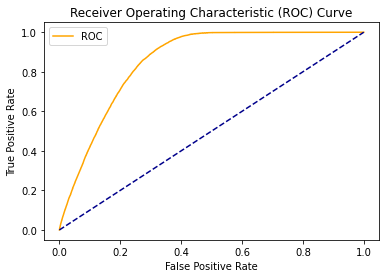

In [ ]:
plot_roc_curve(fpr,tpr)

## **Save Model**

In [ ]:
# save model
estimator = Pipeline([('preprocess', preprocessor2),('model', RandomForestClassifier(class_weight = 'balanced',random_state=123,max_depth=20, max_features=0.3, min_samples_leaf=10, n_estimators=200))])
estimator.fit(X_train2, y_train2)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['Age', 'Annual_Premium']),
                                                 ('categoric_pipe',
                                                  Pipeline(steps=[('oh_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Damage',
                                                   'Previously_

In [ ]:
loaded_model1 = estimator

## **Evaluation Confusion Metrix (X_train)**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
thresholds = 0.415058
y_pred_thrs_p3 = loaded_model1.predict_proba(X_train2)[:,1]>=thresholds
y_pred_thrs3 = loaded_model1.predict(X_train2)

print('precision :', precision_score (y_train2, y_pred_thrs_p3))
print('recall :', recall_score (y_train2, y_pred_thrs_p3))
print('F1 score :', f1_score (y_train2, y_pred_thrs_p3))
print('ROC AUC :', roc_auc_score (y_train2, y_pred_thrs_p3))

precision : 0.2949675716860865
recall : 0.9708841789766646
F1 score : 0.4524690170254919
ROC AUC : 0.8233664654468762


              precision    recall  f1-score   support

           0       0.99      0.68      0.80    234079
           1       0.29      0.97      0.45     32697

    accuracy                           0.71    266776
   macro avg       0.64      0.82      0.63    266776
weighted avg       0.91      0.71      0.76    266776



Text(33.0, 0.5, 'Realita')

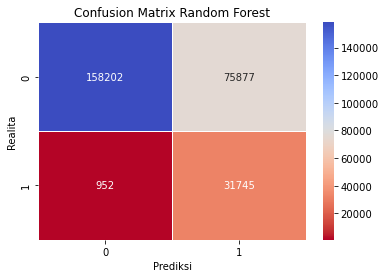

In [ ]:
threshold = 0.415058
y_pred_thr3=np.where(loaded_model1.predict_proba(X_train2)[:,1]>=threshold,1,0)

#predict test
cnf_matrix=confusion_matrix(y_train2,y_pred_thr3)
print(classification_report(y_train2,y_pred_thr3))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

## **Evaluation Confusion Metrix (X_test)**

In [ ]:
thresholds = 0.415058
y_pred_thrs_p2 = loaded_model1.predict_proba(X_test2)[:,1]>=thresholds
y_pred_thrs2 = loaded_model1.predict(X_test2)

print('precision :', precision_score (y_test2, y_pred_thrs_p2))
print('recall :', recall_score (y_test, y_pred_thrs_p2))
print('F1 score :', f1_score (y_test, y_pred_thrs_p2))
print('ROC AUC :', roc_auc_score (y_test, y_pred_thrs_p2))

precision : 0.28037100949094046
recall : 0.92756725897381
F1 score : 0.43058983320358435
ROC AUC : 0.7975057188010996


              precision    recall  f1-score   support

           0       0.99      0.67      0.80    100320
           1       0.28      0.93      0.43     14013

    accuracy                           0.70    114333
   macro avg       0.63      0.80      0.61    114333
weighted avg       0.90      0.70      0.75    114333



Text(33.0, 0.5, 'Realita')

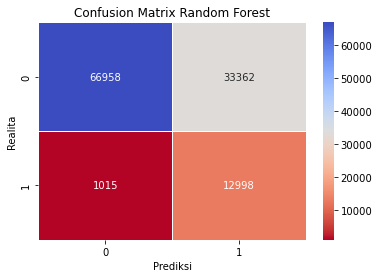

In [ ]:
threshold = 0.415058
y_pred_thr2=np.where(loaded_model1.predict_proba(X_test2)[:,1]>=threshold,1,0)

#predict test
cnf_matrix=confusion_matrix(y_test2,y_pred_thr2)
print(classification_report(y_test2,y_pred_thr2))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

## **Feature Importance**

In [ ]:
# eXplainable AI
!pip install lime
from lime import lime_tabular
!pip install shap
import shap

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# transform X_train
X_train_transformed2 = loaded_model1.named_steps['preprocess'].transform(X_train2)

In [ ]:
# convert ke format dataframe
X_train_transformed2 = pd.DataFrame(X_train_transformed2)

In [ ]:
# transform X_test
X_test_transformed2 = loaded_model1.named_steps['preprocess'].transform(X_test2)
X_test_transformed2 = pd.DataFrame(X_test_transformed2)

In [ ]:
shap_model = loaded_model1.named_steps['model'].fit(X_train_transformed2, y_train2)
explainer = shap.TreeExplainer(shap_model)
sample = X_test_transformed2.sample(1000,random_state=123)
shap_values = explainer.shap_values(sample)

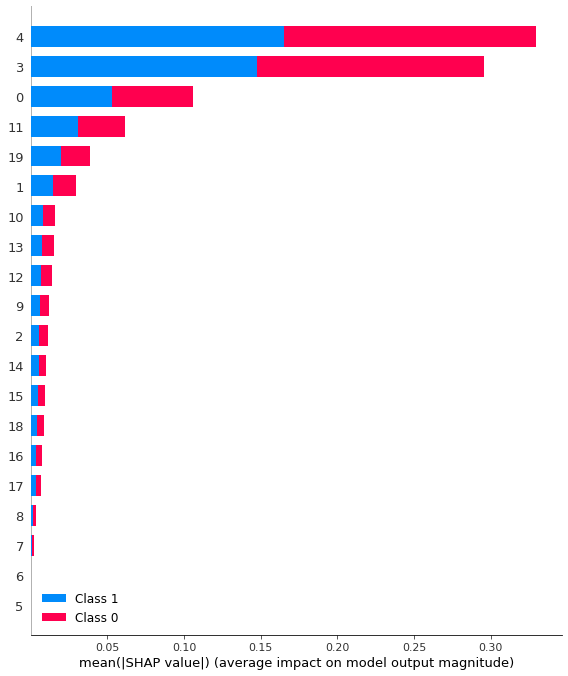

In [ ]:
shap.summary_plot(shap_values, sample, plot_type="bar")

Keterangan:

Kolom 0: Age
</br>Kolom 1: Annual_Premium
</br>Kolom 2: Gender
</br>Kolom 3: Vehicle_Damage
</br>Kolom 4: Previously_Insured
</br>Kolom 5-12: Policy_Sales_Channel
</br>Kolom 13-18: Region_Code
</br>Kolom 19: Vehicle_Age
</br>Kolom 20: Age_cat
</br>Kolom 21: Anual_Membership

**Yang memiliki impact tertinggi pada target adalah fitur <br>**
1.   Vehicle Damage
2.   Previously Insured
3.   Age


## **Shap Values**

Bagaimanakah dampak dari masing-masing fitur?
Membuat target cenderung positif atau negatif?

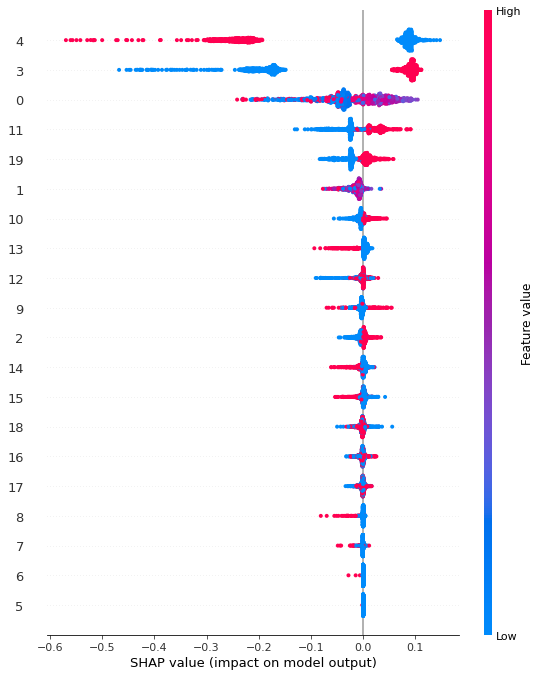

In [ ]:
shap.summary_plot(shap_values[1], sample)

**Dampak yang ditimbulkan oleh masing-masing fitur <br>**
1.   Vehicle Damage : semakin rendah nilai fiturnya, response yang diberikan cenderung negatif
2.   Previously Insured : semakin tinggi nilai fiturnya, response yang diberikan cenderung negatif
3.   Age : semakin rendah nilai fiturnya, response yang diberikan cenderung negatif

**Customer dengan kondisi**: <br>
-Kendaraan yang memiliki kerusakan <br>
-Kondisi saat ini belum memiliki asuransi kendaraan <br>
-Berumur/ usia matang <br>
**Akan cenderung untuk memberikan rensponse positif**
